## Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
df = pd.read_json('train.data.jsonl', orient='values', lines=True, encoding='utf-8')
dev = pd.read_json('dev.data.jsonl', orient='values', lines=True, encoding='utf-8')

y_train = pd.read_json('train.label.json',orient='index', convert_dates = False, encoding='utf-8',convert_axes=False)
y_dev = pd.read_json('dev.label.json',orient='index', convert_dates = False, encoding='utf-8',convert_axes=False)

test = pd.read_json('test.data.jsonl', orient='values', lines=True, encoding='utf-8')

In [3]:
y_dev.columns = ['label']
y_dev['index'] = y_dev.index
y_dev['lab'] = [1 if i=='rumour' else 0 for i in y_dev.label]

y_train.columns = ['label']
y_train['index'] = y_train.index
y_train['lab'] = [1 if i=='rumour' else 0 for i in y_train.label]

In [4]:
cov = pd.read_json('covid.data.jsonl', orient='values', lines=True, encoding='utf-8')

In [181]:
from ast import literal_eval #get sure its read list properly
cov1 = pd.read_csv('covid.csv',converters={"sentiment": literal_eval})

In [7]:
cov1

Unnamed: 0                                               text  \
0               0  According to the New York Times, Warner Bros. ...   
1               1  Hurricane Hanna has made landfall in Texas.\n\...   
2               2  Monkeys on the loose in India with stolen coro...   
3               3  Eastleigh and Swahili Arabs in Mombasa where c...   
4               4  “If Trump felt comfortable having it here, the...   
...           ...                                                ...   
17453       17453  I wonder how many lives could’ve been saved if...   
17454       17454  The @thetimes front page on 17th March. The fi...   
17455       17455  Trump just completed the racism trifecta in a ...   
17456       17456  Here are a few of my photographs from today’s ...   
17457       17457  ‘IT’S GONE’: Bill De Blasio Says NYC Facing $9...   

                            source         ratio  tag  isolation  \
0                     Film Updates  6.875740e-04    1   1.000000   
1                    Texas Tribune  2.382643e-01    0   0.500000   
2                         The Hill  6.736647e-05    0   1.000000   
3                       Bel Akinyi  7.303495e-03    0   0.750000   
4                   Heidi Przybyla  6.738345e-03    0   0.962963   
...                            ...           ...  ...        ...   
17453                Scott Dworkin  1.067175e-01    0   0.888889   
17454  Nadine Dorries 🇬🇧#StayAlert  9.317593e-03    0   0.986486   
17455                 DNC War Room  1.258599e-03    0   0.500000   
17456               Jessica Taylor  9.672158e-02    1   0.500000   
17457                 Sean Hannity  9.571514e-07    0   0.950000   

                                               sentiment  link        fav  \
0                                               [-0.128]     1  17.147715   
1                                           [0.0, -0.25]     1  18.002130   
2                                              [-0.6705]     1  16.700311   
3                      [-0.34, -0.3134, -0.2023, 0.3612]     0  19.256195   
4      [-0.1531, 0.6115, -0.1154, -0.9286, 0.0, -0.81...     1   6.854568   
...                                                  ...   ...        ...   
17453  [-0.4019, -0.9117, -0.7964, -0.7003, -0.5499, ...     0  11.422406   
17454  [0.0, 0.4584, 0.7608, 0.0, -0.2732, 0.296, -0....     1   2.627472   
17455                                  [-0.5423, -0.431]     0  18.427656   
17456                                     [0.0, -0.3278]     1   4.812181   
17457  [0.0, -0.566, -0.5673, -0.9584, -0.1027, -0.40...     1   7.680779   

           deep  low       label                index  
0      1.000000  0.0      rumour  1272262651100434433  
1      1.000000  0.0  non-rumour  1287153210990395392  
2      1.000000  0.0  non-rumour  1266555444283179008  
3      0.500000  0.0  non-rumour  1257715199655755779  
4      0.074074  0.0  non-rumour  1274338812173393920  
...         ...  ...         ...                  ...  
17453  0.222222  0.0  non-rumour  1249502859185590272  
17454  0.027027  0.0  non-rumour  1284050414619459586  
17455  1.000000  0.0  non-rumour  1274505289614725122  
17456  1.000000  0.0  non-rumour  1267884642637676545  
17457  0.100000  0.0  non-rumour  1265801718958301184  

[17458 rows x 13 columns]

In [6]:
cov1.shape

(17458, 13)

In [8]:
class node(object):
    """
    Tree data structure.
    """
    def __init__(self, value, datas, children = []):
        """
        Constructor. Contains:
            value as id_str
            datas as tweet dictionary
            children as tweet responses
        """
        self.value = value
        self.children = children
        self.datas = datas

    def printed(self, level=0):
        """
        Function to visualize the tree
        """
        print("\t"*level+self.value+"\n")
        if len(self.children)>0:
            for child in self.children:
                child.printed(level+1)

                
def bfs(value, root):
    """
    Breadth first search to look for a node in a tree given its id_str. 
    Start from the root of a given tree.
    """
    queue = []
    queue.append(root)
    while len(queue) > 0:
        current = queue.pop(0)
        if current.value == value:
            return current
        for c in current.children:
            queue.append(c)
    return None

def preOrder(node, by_deep):
    """
    Flatten a tree using pre-orden algorithm.
    """
    text=node.datas['text']
    #node.children.sort(key= lambda x: datetime.strftime(datetime.strptime(x.datas['created_at'],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S'), reverse= True)
    if by_deep:
        node.children.sort(key=lambda x: len(x.children), reverse=False)
    else:
        node.children.sort(key= lambda x: x.datas['favorite_count'], reverse= True)
    
    for child in node.children:
        text += preOrder(child)
    return ' ' + text

def getGraph(df,k):  
    """
    Build a tree given a list of id_str and replay to id_str. 
    Its iterates through the tree until all nodes in the list have been added.
    """
    root = node(df.iloc[k,0]['id_str'], datas = df.iloc[k,0])
    queue = [i for i in df.iloc[k,1:] if i is not None]

    while queue:
        current = queue.pop(0)
        parent = bfs(current['in_reply_to_status_id_str'], root)
        if parent is not None:
            parent.children = parent.children + [node(current['id_str'], datas = current)]
        elif current['in_reply_to_status_id_str'] in [i['id_str'] for i in queue]:
            queue.append(current)
        else:
            #creates an empty node and assumes its connects directly to root
            root.children = root.children + [node(current['in_reply_to_status_id_str'], datas = {'favorite_count':0, 'text':' ', 'id_str': current['in_reply_to_status_id_str']})]
            queue.append(current)
    
    return root

def simpleConcat(df,k, n=-1):
    """
    Concatenate event tweets text in the order of the original dataset
    Takes as arguments de dataframe, event row and the maximum number of tweet to concatenate.
    """
    text = [i['text'] for i in df.iloc[k,:] if i is not None]
    return ' '.join(text[:n])

def sortByDate(df,k,n=-1):
    """
    Concatenate event tweets text ordered by time stamp.
    Takes as arguments de dataframe, event row and the maximum number of tweet to concatenate.
    """
    from datetime import datetime
    twt = pd.DataFrame([t for t in df.iloc[k,:] if t is not None])
    twt['created_at'] = twt.created_at.apply(lambda x: datetime.strftime(datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')) 
    twt = twt.sort_values(by='created_at')
    
    return ' '.join(twt[:n].text)

def deepMetric(node):
    """
    Takes as argument a root node of a tree data structure.
    Returns the maximum depth or the height of a tree and the number of nodes.
    """
    maxDeep = 0
    n_nodes = 1
    for c in node.children:
        current, n_n = deepMetric(c)
        n_nodes += n_n
        if maxDeep < current:
            maxDeep = current
    return maxDeep + 1, n_nodes

def ave_deep(node):
    """
    Takes as argument a root node of a tree data structure.
    Takes the deepMetric outputs and calculate the depth normalized by the total number of nodes.
    """
    max_deep, n_nodes = deepMetric(node)
    return max_deep/n_nodes
    
def low2high(node):
    """
    Takes as argument a root node of a tree data structure.
    Returns the number of directed edges were user source is less popular than the target and the number of edges.
    """
    n_edges = 1
    n_low2high = 0
    for c in node.children:
        n_e, n_l2h = low2high(c)
        n_edges += n_e
        n_low2high += n_l2h
        if 'user' in node.datas and 'user' in c.datas:
            if node.datas['user']['followers_count'] < c.datas['user']['followers_count']:
                n_low2high += 1
            
    return n_edges, n_low2high

def lowDifussion(node):
    """
    Takes as argument a root node of a tree data structure.
    Calculate the ratio went a tweet goes from a low to high difussion node versus the total tweets.
    It uses output from low2high function.
    """
    edges, low = low2high(node)
    return low/edges

def leaf_count(node):
    """
    Takes as argument a root node of a tree data structure.
    Counts the number of leafs in a tree and the total number of nodes.
    """
    count = 0
    total_c = 1
    for c in node.children:
        part_count, total = leaf_count(c)
        count += part_count
        total_c += total
    if len(node.children) < 1:
        count +=1
    return count, total_c

def isolated_node(node):
    """
    Takes as argument a root node of a tree data structure.
    Calcultes the isolation ratio, the number of tweets without a replay versus the totla number of tweets.
    """
    leaf, total = leaf_count(node)
    return leaf/total

def nltk_sentiment(sentence):
    """
    Calculates the sentiment of a text using Vader sentiment analyzer from NLTK.
    """
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score['compound']

def sentimentSeq(df,k):
    """
    Calculates the sentiment of each text in a event.
    """
    return [nltk_sentiment(t['text']) for t in df.iloc[k,:] if t is not None]

def sentDate(df, k):
    """
    It creates a list with the time stamp of each tweet in an event.
    """
    from datetime import datetime
    twt = pd.DataFrame([t for t in df.iloc[k,:] if t is not None])
    twt['created_at'] = twt.created_at.apply(lambda x: datetime.strftime(datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')) 
    #twt = twt.sort_values(by='created_at')
    return twt.created_at

def favCalculation(df,k):
    """
    """
    SMOOTHING = 0.00001
    fav = [i['favorite_count'] for i in df.iloc[k,1:] if i is not None]
    mean = np.mean(fav) if len(fav) > 0 else 0
    return np.log(1+df.iloc[k,0]['favorite_count']/(SMOOTHING + mean)) 

from torchtext.data.utils import get_tokenizer
from transformers import BertTokenizer

token = get_tokenizer('spacy', 'en_core_web_sm')


def transformDF(df, label, tokenize=True, concat_type = 'simple', n_tweets = None, order_by_deep = False):
    """
    Transform and extract tweets data to a pandas dataframe, ready to export to json.
    Takes the original Dataframe and the list of labels as arguments.
    
    Arguments: df, label, tokenize=True, concat_type = 'simple', n_tweets = -1, order_by_deep = False
    """
    
    index = []
    string = []
    source = []
    has_tag = []
    has_link = []
    fav=[]
    sent = []
    sent_date = []
    deep = []
    low=[]
    isolation =[]
    frifo_ratio = [] #friends to followers ratio

    for k in range(df.shape[0]):
        if concat_type == 'simple':
            concat = simpleConcat(df,k,n_tweets)
        elif concat_type == 'date':
            concat = sortByDate(df,k,n_tweets)
        else:
            concat = preOrder(getGraph(df,k), order_by_deep)
        if tokenize:
            concat = token(concat)
            concat = [i.lower() for i in concat]
        string.append(concat)
        
        tree = getGraph(df,k)
        deep.append(ave_deep(tree))
        low.append(lowDifussion(tree))
        
        index.append(df.iloc[k,0]['id_str'])
        source.append(df.iloc[k,0]['user']['name'])
        has_tag.append(1 if '#' in df.iloc[k,0]['text'] else 0)
        has_link.append(1 if 'http' in df.iloc[k,0]['text'] else 0)
        tmp = [x['favorite_count'] for x in df.iloc[k,1:] if x is not None]
        means = np.mean(tmp) if len(tmp) > 0 else 0
        fav.append(favCalculation(df,k))
        sent.append(sentimentSeq(df,k))
        sent_date.append(sentDate(df,k))
        isolation.append(isolated_node(tree))
        frifo_ratio.append(df.iloc[k,0]['user']['friends_count']/(df.iloc[k,0]['user']['followers_count']+0.000001))

    
    return pd.DataFrame({'text': string,'source': source, 'ratio':frifo_ratio, 'tag': has_tag, 'isolation':isolation, 'sentiment': sent,
                         'link': has_link, 'fav': fav, 'deep': deep, 'low': low,'label': label, 'index': index})

In [12]:
transformDF?

Signature:
transformDF(
    df,
    label,
    tokenize=True,
    concat_type='simple',
    n_tweets=None,
    order_by_deep=False,
)
Docstring:
Transform and extract tweets data to a pandas dataframe, ready to export to json.
Takes the original Dataframe and the list of labels as arguments.

Arguments: df, label, tokenize=True, concat_type = 'simple', n_tweets = -1, order_by_deep = False
File:      c:\users\framo\google drive\0 mit\0sem 1 2021\nlp\project\<ipython-input-9-c705fe670756>
Type:      function


In [10]:
#train1 = transformDF(df, y_train.lab, False)
#devel = transformDF(dev, y_dev.lab, False)
cov1 = transformDF(cov, cov.index, False)

In [40]:
cov1.to_csv('covid.csv')

### Classify

In [23]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertModel
import torch.nn as nn

class SSTDataset(Dataset):

    def __init__(self, df, maxlen):

        #Store the contents of the file in a pandas dataframe
        self.df = df

        #Initialize the BERT tokenizer
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

        self.maxlen = maxlen

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):

        #Selecting the sentence and label at the specified index in the data frame
        sentence = self.df.loc[index, 'text']
        label = self.df.loc[index, 'label']
        indice = self.df.loc[index, 'index']

        #Preprocessing the text to be suitable for BERT
        tokens = self.tokenizer.tokenize(sentence) #Tokenize the sentence

        tokens = ['[CLS]'] + tokens + ['[SEP]'] #Insering the CLS and SEP token in the beginning and end of the sentence
        if len(tokens) < self.maxlen:
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))] #Padding sentences
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]']
        

        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens) #Obtaining the indices of the tokens in the BERT Vocabulary
        tokens_ids_tensor = torch.tensor(tokens_ids) #Converting the list to a pytorch tensor
        attn_mask = (tokens_ids_tensor != 0).long()
        return tokens_ids_tensor, attn_mask, label, indice

from torch.utils.data import DataLoader
MAX_LENGTH = 512
BATCH_SIZE = 16

train_set = SSTDataset(cov1, maxlen = MAX_LENGTH)
test_loader = DataLoader(train_set, batch_size = BATCH_SIZE, num_workers = 0)

class SentimentClassifier(nn.Module):

    def __init__(self):
        super(SentimentClassifier, self).__init__()
        #Instantiating BERT model object 
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased')
        embedding_dim = self.bert_layer.config.hidden_size
        self.rnn = nn.GRU(embedding_dim,
                          256,
                          num_layers = 2,
                          bidirectional = True,
                          batch_first = True,
                          dropout = 0.5)
        
        self.out = nn.Linear(256 * 2, 1)
        self.dropout = nn.Dropout(p=0.5)
    def forward(self, seq, attn_masks):

        with torch.no_grad():
            embedded = self.bert(features)[0]
        _, hidden = self.rnn(embedded)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        output = self.out(hidden)

        return logits

In [25]:
device = 'cuda'
def predict(model, iterator):
    model.eval()
    predict = []
    index = []

    with torch.no_grad():
        for seq, attn_masks, labels, indice in iterator:
            seq, attn_masks, labels = seq.to(device), attn_masks.to(device), labels.to(device)
            logits = net(seq, attn_masks)
            probs = torch.round(torch.sigmoid(logits.unsqueeze(-1)))
            predict = predict + probs.tolist()
            index = index + list(indice)
    
    result = {x:y for x,y in zip(index, predict)}
    return result, index, predict

net = SentimentClassifier()
net.to(device)
net.load_state_dict(torch.load('sstcls_4.dat'))
dict_p1, a, b = predict(net, test_loader)
#out = {k:'rumour' if v[0][0]>0 else 'non-rumour' for k,v in dict_p1.items()}
#with open('test-output.json', 'w') as fp:
#    json.dump(out, fp)

In [30]:
out = {k:'rumour' if v[0][0]>0 else 'non-rumour' for k,v in dict_p1.items()}

In [ ]:
#assign label
cov['label'] = [out[i] for i in cov.index]

# Analytics

In [39]:
cov1[cov1.label == 'rumour']

text  \
0      According to the New York Times, Warner Bros. ...   
9      Who steals the SA’s COVID-19 monies ?  Hon Nqa...   
15     You know, #Donald says he has tested negative ...   
17     2 new cases of #COVID19 have been confirmed in...   
23     A further 155 people have died with coronaviru...   
...                                                  ...   
17425  Pelosi is now hinting at doing another sham in...   
17429  Between:\n- Fraudulent inflation of COVID-19 d...   
17433  RETWEET! Whistleblower Doctor Admits The "Viru...   
17437  ++ Italy's 🇮🇹 number of registered Covid-19 ca...   
17440  BREAKING NEWS: More than 180 learners at the M...   

                     source     ratio  tag  isolation  \
0              Film Updates  0.000688    1   1.000000   
9            Bantu Holomisa  0.014391    1   0.833333   
15              bettemidler  0.000048    1   0.916667   
17                     NCDC  0.000334    1   0.750000   
23            BBC News (UK)  0.000009    0   0.750000   
...                     ...       ...  ...        ...   
17425     Mindy Robinson 🇺🇸  0.049164    1   1.000000   
17429         Martin Geddes  0.095472    0   0.500000   
17433   Deep State Exposed®  0.855708    0   0.947368   
17437  Ferdinando Giugliano  0.032619    0   1.000000   
17440             SAfm news  0.000457    1   0.947368   

                                               sentiment  link        fav  \
0                                               [-0.128]     1  17.147715   
9      [-0.2866, 0.4404, 0.6435, 0.9167, -0.296, 0.2023]     0   7.212749   
15     [-0.6341, -0.1779, -0.6199, 0.5256, -0.5609, 0...     0  12.345540   
17                     [-0.5994, 0.6808, 0.4939, 0.6966]     1  20.211273   
23                           [-0.5106, 0.3527, 0.0, 0.0]     1   3.397021   
...                                                  ...   ...        ...   
17425                                          [-0.7783]     1  19.194947   
17429                                  [-0.9371, 0.3109]     0  19.822848   
17433  [0.4184, 0.4374, -0.4215, -0.8779, -0.5267, -0...     1   9.951618   
17437                                          [-0.5574]     0  20.368161   
17440  [0.5574, 0.6369, 0.3287, 0.2584, -0.9059, 0.44...     0   5.484602   

           deep  low   label                index  
0      1.000000  0.0  rumour  1272262651100434433  
9      0.333333  0.0  rumour  1283500526450159616  
15     0.166667  0.0  rumour  1239213982243868672  
17     0.500000  0.0  rumour  1242502830918979585  
23     0.500000  0.0  rumour  1280522599869579264  
...         ...  ...     ...                  ...  
17425  1.000000  0.0  rumour  1244400887369359362  
17429  1.000000  0.0  rumour  1256306735783964672  
17433  0.105263  0.0  rumour  1252493590317674496  
17437  1.000000  0.0  rumour  1242139569249714176  
17440  0.105263  0.0  rumour  1275296120432885760  

[2564 rows x 12 columns]

In [289]:
#cov1['text'] = [simpleConcat(cov,k,None) for k in range(cov.shape[0])]

### Extra Fetures

In [10]:
cov1['lab'] = [1 if i=='rumour' else 0 for i in cov1.label]

cov1['ratio'] = [np.log(1+i) for i in cov1.ratio]

cov1['low'] = [np.log(1+i) for i in cov1.low]

cov1['deep'] = [np.log(1+i) for i in cov1.deep]

cov1['length'] = [np.log(len(i)) for i in cov1.sentiment]

In [302]:
cov1['src_txt'] = [cov.iloc[k,0]['text'] for k in range(cov.shape[0]) if not None]

In [303]:
cov1

Unnamed: 0                                               text  \
0               0  According to the New York Times, Warner Bros. ...   
1               1  Hurricane Hanna has made landfall in Texas.\n\...   
2               2  Monkeys on the loose in India with stolen coro...   
3               3  Eastleigh and Swahili Arabs in Mombasa where c...   
4               4  “If Trump felt comfortable having it here, the...   
...           ...                                                ...   
17453       17453  I wonder how many lives could’ve been saved if...   
17454       17454  The @thetimes front page on 17th March. The fi...   
17455       17455  Trump just completed the racism trifecta in a ...   
17456       17456  Here are a few of my photographs from today’s ...   
17457       17457  ‘IT’S GONE’: Bill De Blasio Says NYC Facing $9...   

                            source         ratio  tag  isolation  \
0                     Film Updates  6.873377e-04    1   1.000000   
1                    Texas Tribune  2.137107e-01    0   0.500000   
2                         The Hill  6.736420e-05    0   1.000000   
3                       Bel Akinyi  7.276954e-03    0   0.750000   
4                   Heidi Przybyla  6.715744e-03    0   0.962963   
...                            ...           ...  ...        ...   
17453                Scott Dworkin  1.013984e-01    0   0.888889   
17454  Nadine Dorries 🇬🇧#StayAlert  9.274452e-03    0   0.986486   
17455                 DNC War Room  1.257808e-03    0   0.500000   
17456               Jessica Taylor  9.232535e-02    1   0.500000   
17457                 Sean Hannity  9.571509e-07    0   0.950000   

                                               sentiment  link        fav  \
0                                               [-0.128]     1  17.147715   
1                                           [0.0, -0.25]     1  18.002130   
2                                              [-0.6705]     1  16.700311   
3                      [-0.34, -0.3134, -0.2023, 0.3612]     0  19.256195   
4      [-0.1531, 0.6115, -0.1154, -0.9286, 0.0, -0.81...     1   6.854568   
...                                                  ...   ...        ...   
17453  [-0.4019, -0.9117, -0.7964, -0.7003, -0.5499, ...     0  11.422406   
17454  [0.0, 0.4584, 0.7608, 0.0, -0.2732, 0.296, -0....     1   2.627472   
17455                                  [-0.5423, -0.431]     0  18.427656   
17456                                     [0.0, -0.3278]     1   4.812181   
17457  [0.0, -0.566, -0.5673, -0.9584, -0.1027, -0.40...     1   7.680779   

           deep  ...                index lab    length  \
0      0.693147  ...  1272262651100434433   1  2.079442   
1      0.693147  ...  1287153210990395392   0  2.484907   
2      0.693147  ...  1266555444283179008   0  2.197225   
3      0.405465  ...  1257715199655755779   0  3.496508   
4      0.071459  ...  1274338812173393920   0  5.407172   
...         ...  ...                  ...  ..       ...   
17453  0.200671  ...  1249502859185590272   0  4.382027   
17454  0.026668  ...  1284050414619459586   0  6.251904   
17455  0.693147  ...  1274505289614725122   0  2.833213   
17456  0.693147  ...  1267884642637676545   0  2.639057   
17457  0.095310  ...  1265801718958301184   0  5.123964   

                                               sent_date  time_len    sent  \
0      0    2020-06-14 20:20:28
Name: created_at, dty...       0.0 -0.1280   
1      0    2020-07-25 22:30:14
1    2020-07-26 01:04...    9236.0 -0.2500   
2      0    2020-05-30 02:22:04
Name: created_at, dty...       0.0 -0.6705   
3      0    2020-05-05 16:54:05
1    2020-05-07 01:50...  122817.0 -0.4548   
4      0     2020-06-20 13:50:23
1     2020-06-20 15:...   28665.0 -0.9992   
...                                                  ...       ...     ...   
17453  0    2020-04-13 01:01:10
1    2020-04-13 06:02...   60340.0 -0.9844   
17454  0     2020-07-17 09:00:50
1     2020-07-17 17:...  110904.0 

## Feature description

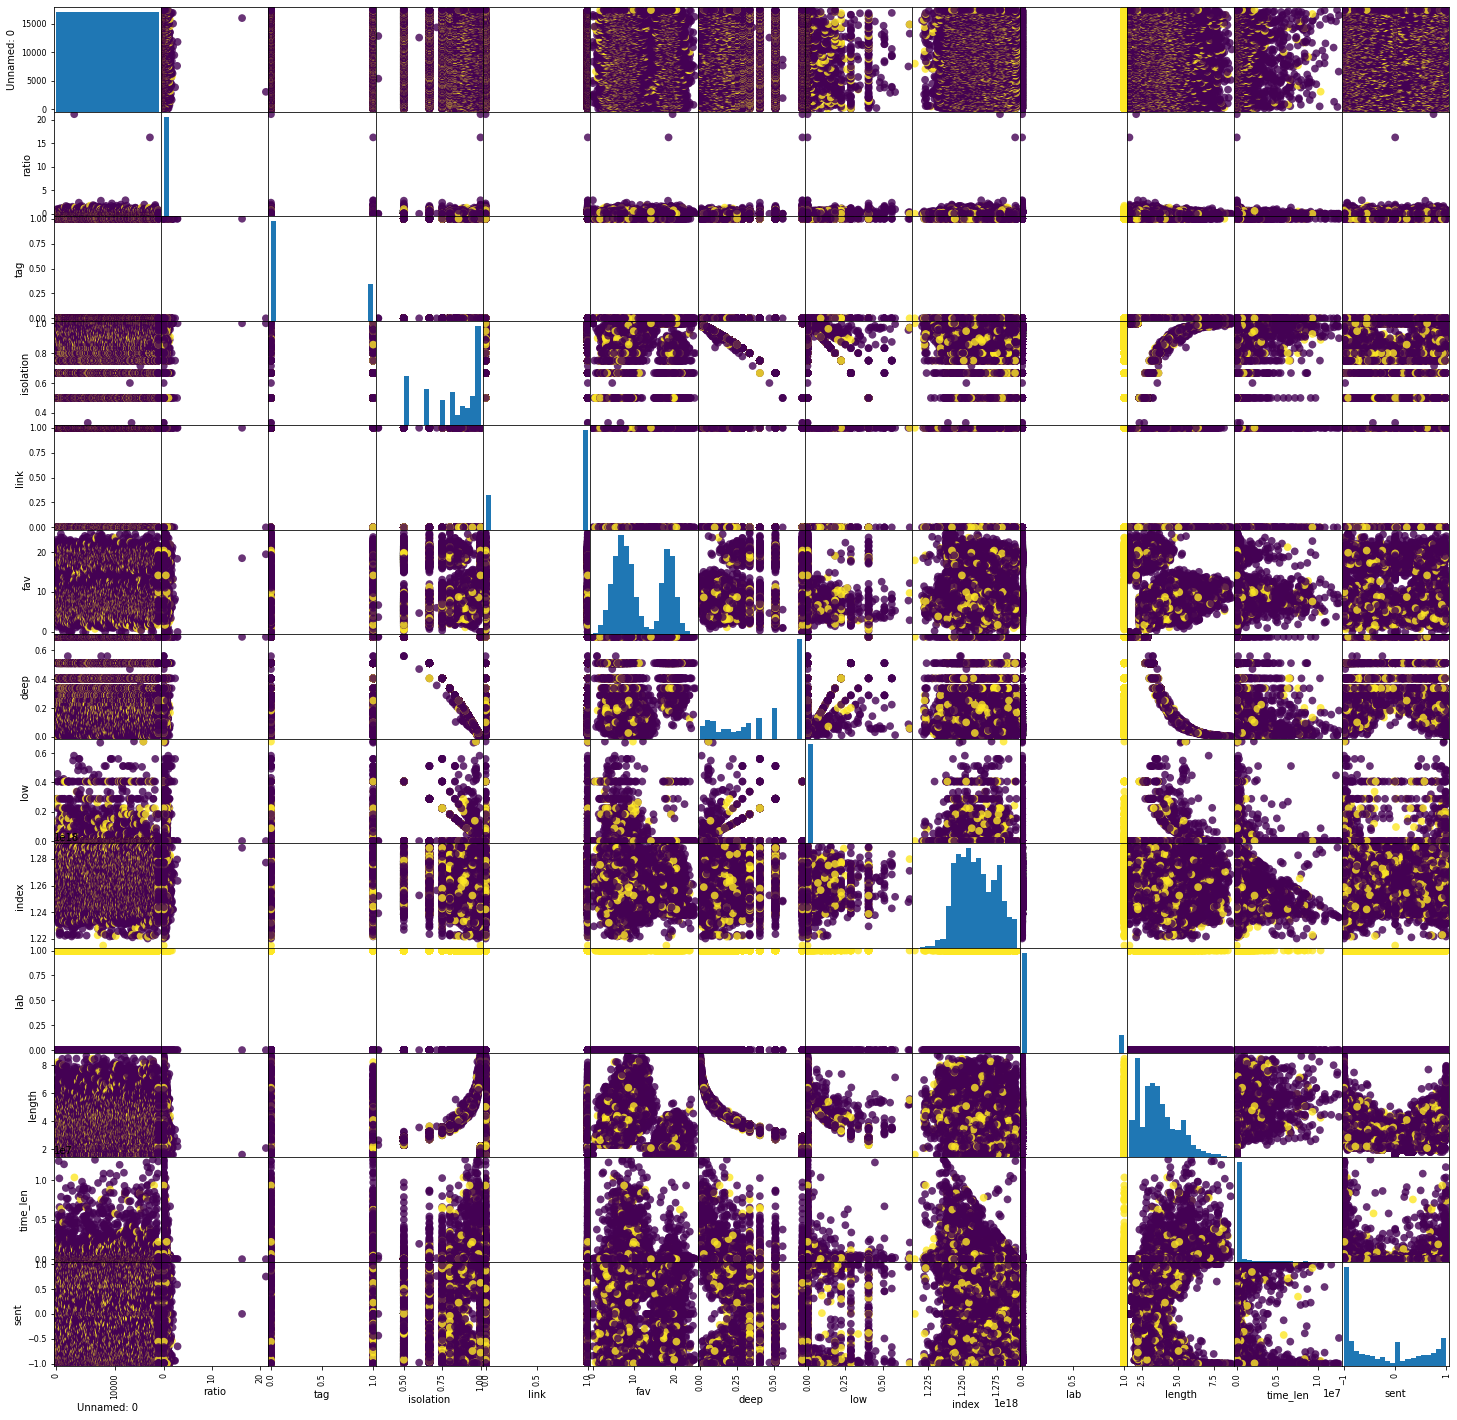

In [23]:
pd.plotting.scatter_matrix(cov1.iloc[:,:], c=cov1.lab, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8);

### Most frequent words by falsehood

In [306]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.utils import simple_preprocess
from collections import Counter
from gensim.models import Word2Vec


def getCommonBIgrams(text_list):
    stp = nltk.corpus.stopwords.words('english')
    data_words = text_list
    #data_words = dm3.sent.apply(word_tokenize)
    data_words = [simple_preprocess(i,deacc=True) for i in data_words]
    # Build the bigram and trigram models
    bigram = Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)

    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stp] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    text=remove_stopwords(data_words)
    text=make_bigrams(text)
    text=make_trigrams(text)
    
    bigram_model = Word2Vec(bigram_mod[data_words], size=100)
    bigram_model_counter = Counter()
    for key in bigram_model.wv.vocab.keys():
        if key not in stp:
            if len(key.split("_")) > 1:
                bigram_model_counter[key] += bigram_model.wv.vocab[key].count
    return bigram_model_counter

In [296]:
#non-rumours
bigram_model_nonrumour = getCommonBIgrams(cov1[cov1.lab==0].text)
bigram_model_nonrumour.most_common(30)

[('mike_pence', 2620),
 ('united_states', 2520),
 ('white_house', 2016),
 ('nursing_homes', 1901),
 ('social_distancing', 1753),
 ('task_force', 1436),
 ('wear_mask', 1346),
 ('death_toll', 1341),
 ('covid_', 1257),
 ('new_york', 1249),
 ('fake_news', 1069),
 ('under_control', 993),
 ('tested_positive', 990),
 ('dr_fauci', 957),
 ('stock_market', 950),
 ('fox_news', 832),
 ('shut_down', 826),
 ('wearing_mask', 818),
 ('seanhannity_foxnews', 700),
 ('weeks_ago', 660),
 ('joe_biden', 652),
 ('gregabbott_tx', 651),
 ('stay_safe', 591),
 ('south_korea', 589),
 ('second_wave', 561),
 ('year_old', 553),
 ('alyssa_milano', 548),
 ('too_late', 533),
 ('loved_ones', 526),
 ('bill_gates', 491)]

In [301]:
bigram_model_rumour = getCommonBIgrams(cov1[cov1.lab==1].text)
bigram_model_rumour.most_common(30)

[('nytimes_secazar', 588),
 ('tested_positive', 548),
 ('fake_news', 346),
 ('death_toll', 336),
 ('united_states', 272),
 ('at_least', 259),
 ('white_house', 226),
 ('new_york', 212),
 ('nursing_homes', 185),
 ('time_high', 182),
 ('covid_', 174),
 ('dhscgovuk_cmo_england', 173),
 ('ncdcgov_fmohnigeria', 170),
 ('south_korea', 164),
 ('social_distancing', 160),
 ('wear_mask', 129),
 ('jim_jordan', 126),
 ('nytimes_washingtonpost', 125),
 ('mohfw_india_hospitalsapollo', 119),
 ('aiims_newdelhi_pmoindia', 118),
 ('phe_uk_nhsengland', 111),
 ('something_else', 101),
 ('year_old', 92),
 ('heart_attack', 90),
 ('dr_fauci', 89),
 ('huxijin_gt', 89),
 ('task_force', 87),
 ('great_job', 85),
 ('looks_like', 84),
 ('cover_up', 84)]

## Only source Text 

In [307]:
bigram_model_nonrumour = getCommonBIgrams(cov1[cov1.lab==0].src_txt)
bigram_model_nonrumour.most_common(30)

[('white_house', 296),
 ('social_distancing', 222),
 ('new_york', 201),
 ('public_health', 191),
 ('donald_trump', 179),
 ('united_states', 154),
 ('task_force', 142),
 ('tested_positive', 137),
 ('wear_mask', 109),
 ('at_least', 109),
 ('fight_against', 103),
 ('dr_fauci', 103),
 ('boris_johnson', 100),
 ('joe_biden', 90),
 ('bill_gates', 84),
 ('year_old', 82),
 ('prime_minister', 81),
 ('weeks_ago', 76),
 ('health_organization', 70),
 ('death_toll', 66),
 ('so_far', 65),
 ('fox_news', 65),
 ('mike_pence', 64),
 ('last_week', 63),
 ('contact_tracing', 62),
 ('shut_down', 62),
 ('save_lives', 61),
 ('press_conference', 61),
 ('dr_anthony', 59),
 ('federal_government', 59)]

In [308]:
bigram_model_rumour = getCommonBIgrams(cov1[cov1.lab==1].src_txt)
bigram_model_rumour.most_common(30)

[('death_toll', 92),
 ('at_least', 75),
 ('single_day', 49),
 ('united_states', 39),
 ('year_old', 37),
 ('white_house', 29),
 ('south_korea', 27),
 ('so_far', 25),
 ('sadly_died', 23),
 ('johns_hopkins', 23),
 ('this_brings', 22),
 ('south_africa', 21),
 ('last_week', 21),
 ('days_ago', 21),
 ('truck_drivers', 20),
 ('weeks_ago', 20),
 ('how_many', 18),
 ('past_hours', 18),
 ('dominic_cummings', 17),
 ('boris_johnson', 17),
 ('donald_trump', 16),
 ('nursing_homes', 16),
 ('uss_theodore', 15),
 ('prime_minister', 15),
 ('pandemic_began', 14),
 ('fake_news', 14),
 ('higher_than', 14),
 ('via_gatewaypundit', 13),
 ('less_than', 13),
 ('york_city', 13)]

In [419]:
def plot_freq_phrase(bi_rumour, bi_nonrumour):
    h, b = [], []
    for p,v in bi_rumour:
        h.append(p)
        b.append(v)
    rum = pd.DataFrame({'word': h, 'Freq':b})
    rum = rum.sort_values(by='Freq')
    
    h, b = [], []
    for p,v in bi_nonrumour:
        h.append(p)
        b.append(v)
    norum = pd.DataFrame({'word': h, 'Freq':b})
    norum = norum.sort_values(by='Freq')
    
    fig, ax = plt.subplots(2)
    fig.subplots_adjust(left=0.5)
    plt.figure(figsize=(5, 10))
    ax[0].barh(y = rum.word, width=rum.Freq)
    ax[0].set_title('Rumour')
    ax[1].barh(y = norum.word, width=norum.Freq)
    ax[1].set_title('Non-Rumour')

In [420]:
plt.rcParams["figure.figsize"] = (7,15)

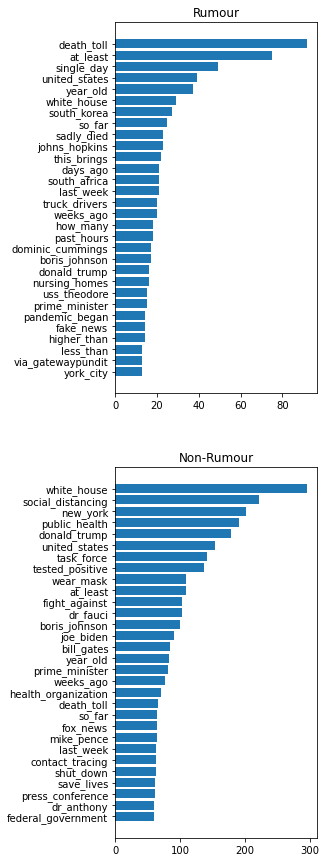

<Figure size 360x720 with 0 Axes>

In [422]:
plot_freq_phrase(bigram_model_rumour.most_common(30),bigram_model_nonrumour.most_common(30))

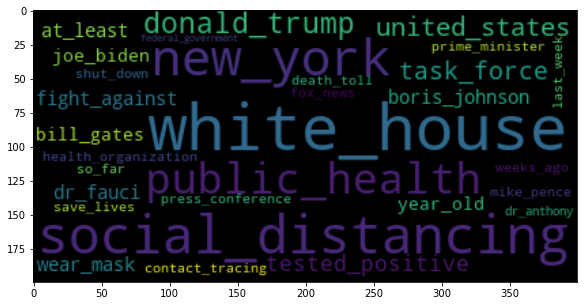

In [335]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().fit_words({k:v for k,v in bigram_model_nonrumour.most_common(30)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

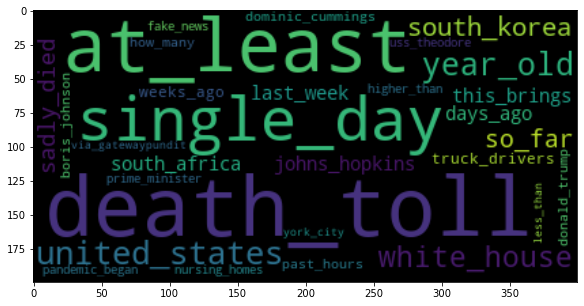

In [337]:
wordcloud = WordCloud().fit_words({k:v for k,v in bigram_model_rumour.most_common(30)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### time series analysis

In [218]:
def custom_sort(x):
    col1 = sorted(enumerate(pd.to_datetime(x.sent_date, format='%Y-%m-%d %H:%M:%S')), key=lambda k: k[1])
    col2 = [x.sentiment[i] for i, _ in col1]
    return [v for _, v in col1], col2

cov1['sent_date'] = [sentDate(cov,k) for k in range(cov.shape[0])]
weveo = cov1[['sent_date','sentiment']].apply(custom_sort, axis=1, result_type='expand')
weveo['label'] = cov1.lab

In [219]:

cov1['time_len'] = [i[-1]-i[0] for i in weveo.loc[:,0]]
cov1['time_len'] = [i.total_seconds() for i in cov1.time_len]

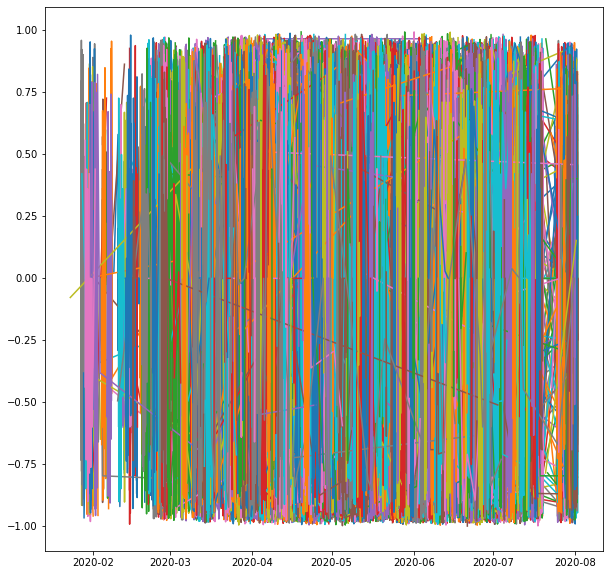

In [220]:
for i in weveo.index[weveo.label==0]:
    plt.plot(weveo.loc[i,0],weveo.loc[i,1])

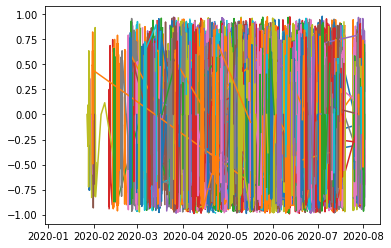

In [61]:
for i in weveo.index[weveo.label==1]:
    plt.plot(weveo.loc[i,0],weveo.loc[i,1])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

## Sentiment analysis

In [16]:
import nltk
nltk.download('vader_lexicon')

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\framo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Calculate sentiment for concatenated text

In [17]:
nltk_results = [nltk_sentiment(row) for row in cov1.text]

cov1['sent'] = [x['compound'] for x in nltk_results]

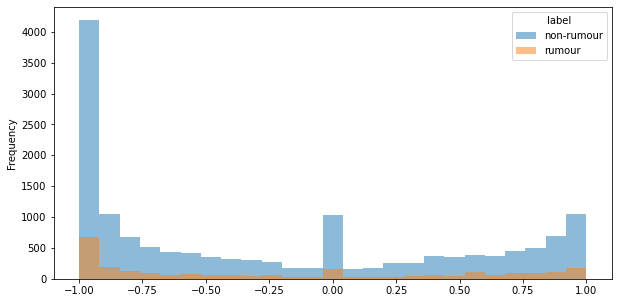

In [140]:
cov1.pivot_table(index='index', columns='label', values='sent').plot(kind='hist', alpha=0.5, bins=25, xlabel ='Sentiment Score')

#### Compare proportions

In [235]:
cov1['cut'] = pd.cut(cov1.sent,9)
total = cov1.cut.value_counts(sort=False)
orange = cov1[cov1.lab==0].cut.value_counts(sort=False)/total *100
blue = cov1[cov1.lab==1].cut.value_counts(sort=False)/total *100

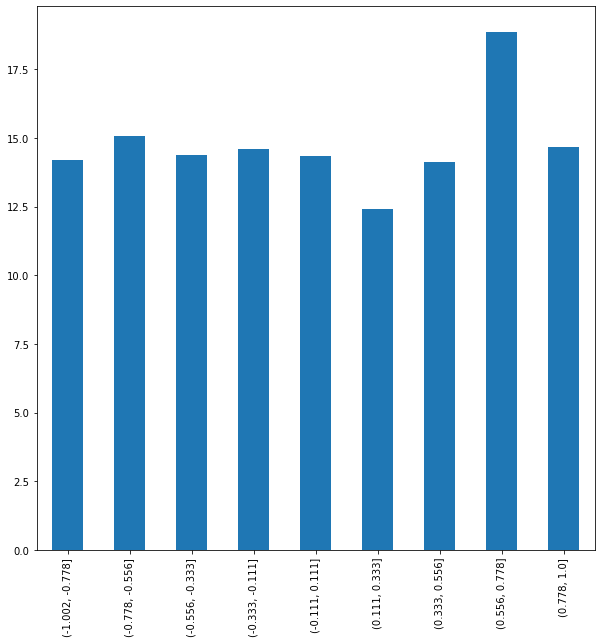

In [236]:
blue.plot(kind='bar')

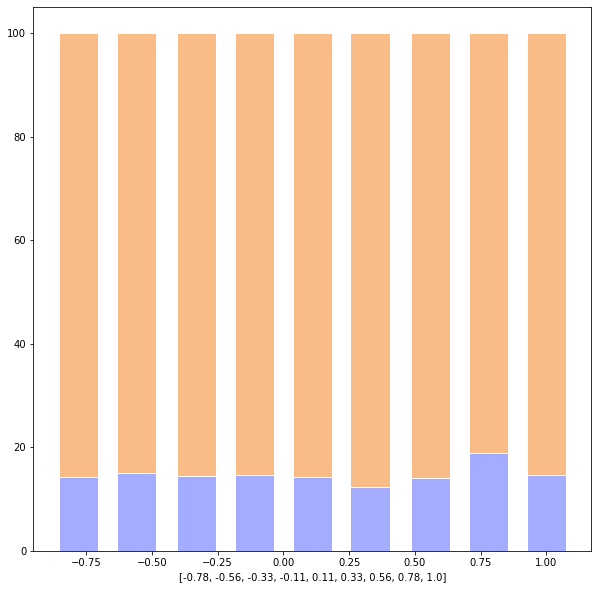

In [237]:
### Stacked proprotional version of the histogram
barWidth = 0.15
r=[round(i.right, 2) for i in total.index]
plt.bar(r, blue, color='#a3acff', edgecolor='white', width=barWidth)
plt.bar(r, orange,bottom=blue, color='#f9bc86', edgecolor='white', width=barWidth)

plt.xlabel(r)
plt.rcParams["figure.figsize"] = (10,5)
# Show graphic
plt.show()


#### Sentiment of the source tweet

In [196]:
cov1['source_sent']=cov1.sentiment.apply(lambda x: x[0])

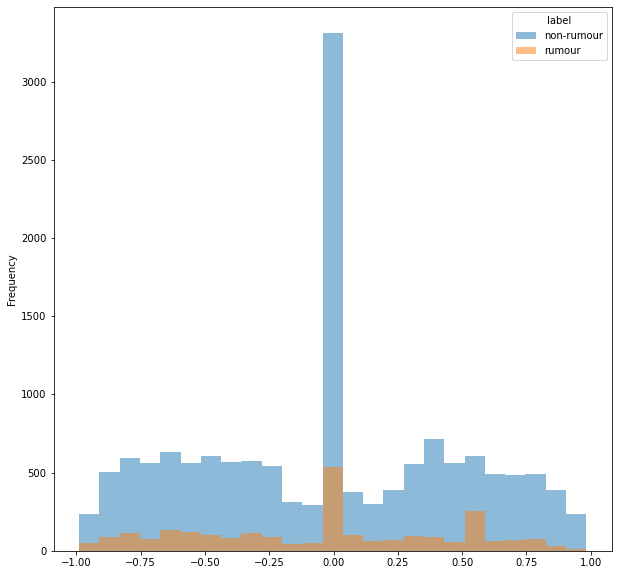

In [198]:
plt.rcParams["figure.figsize"] = (10,10)
cov1.pivot_table(index='index', columns='label', values='source_sent').plot(kind='hist', alpha=0.5, bins=25, xlabel ='Sentiment Score')

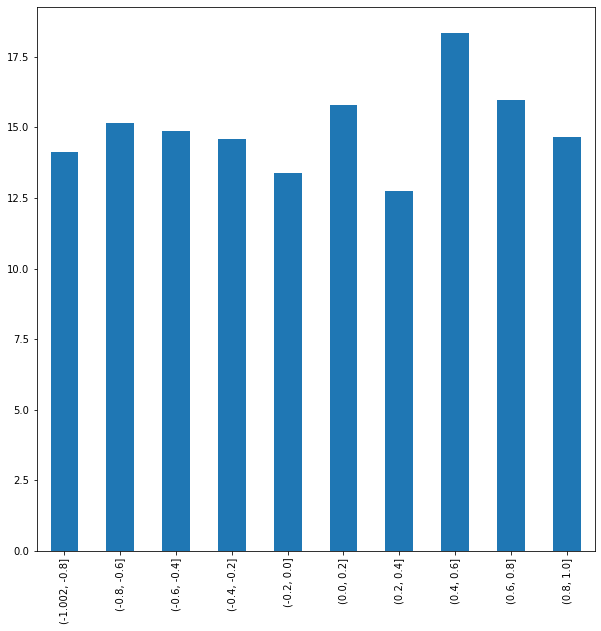

In [200]:
cov3['cut'] = pd.cut(cov1.sent,10)
total = cov3.cut.value_counts(sort=False)
orange = cov3[cov3.label=='non-rumour'].cut.value_counts(sort=False)/total *100
blue = cov3[cov3.label=='rumour'].cut.value_counts(sort=False)/total *100
blue.plot(kind='bar')

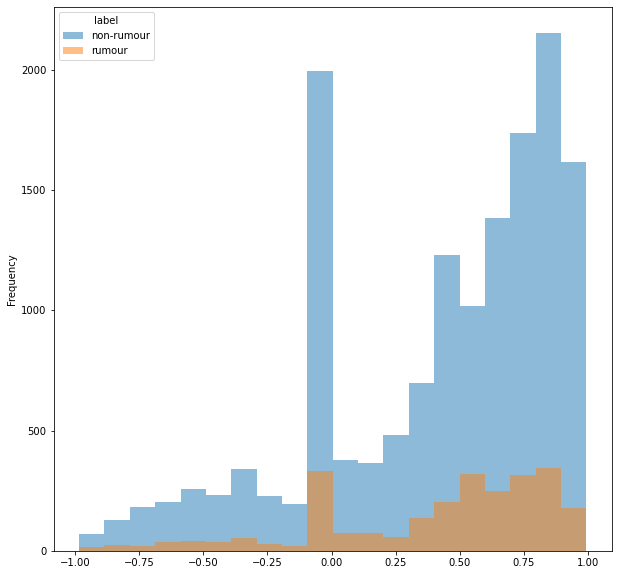

In [233]:
cov1['av_sent']=cov1.sentiment.apply(lambda x: max(x))
cov1.pivot_table(index='index', columns='label', values='av_sent').plot(kind='hist', alpha=0.5, bins=20, xlabel ='Sentiment Score')

## Topic Modeling

Using Latent Dirichlet Allocation. Implementation uses Mallet version of the algorithms as works better than default implemntation in Gensim.

In [141]:
import gensim
import nltk
from gensim import models, utils
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess
import os
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\framo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### To get Mallet

In [ ]:
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#!unzip mallet-2.0.8.zip

In [167]:
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
from multiprocessing import freeze_support
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = "C:\\mallet-2.0.8\\bin\\mallet"

#prepare data to 
text = cov1.text
data_words = list(sent_to_words(text))
data_words = remove_stopwords(data_words)
common_dictionary = Dictionary(data_words)
common_corpus = [common_dictionary.doc2bow(i) for i in data_words]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary,workers=10)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [268]:
cov1[cov1.lab==1].shape

(2564, 21)

### Find the optimal coherence value

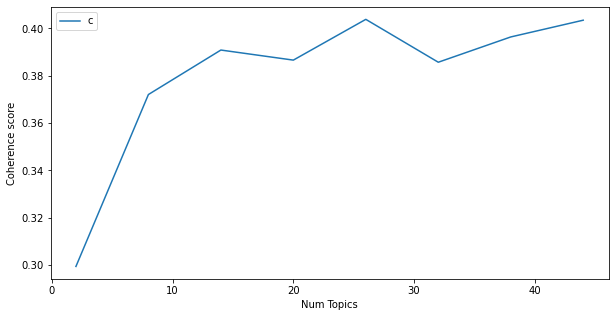

<Figure size 216x216 with 0 Axes>

In [341]:
model_list, coherence_values = compute_coherence_values(dictionary=common_dictionary, corpus=common_corpus, texts=text, start=2, limit=50, step=6)
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.figure(figsize=(3, 3))
plt.show()

### Topics of the best model

In [214]:
model_list[4].print_topics()

[(16,
  '0.051*"covid" + 0.034*"nygovcuomo" + 0.031*"patients" + 0.029*"https" + 0.026*"nursing" + 0.026*"homes" + 0.016*"people" + 0.016*"home" + 0.014*"cuomo" + 0.013*"ny"'),
 (7,
  '0.019*"coronavirus" + 0.019*"https" + 0.018*"speakerpelosi" + 0.018*"mike_pence" + 0.016*"bill" + 0.015*"senschumer" + 0.014*"senatemajldr" + 0.014*"amp" + 0.013*"money" + 0.012*"donaldjtrumpjr"'),
 (9,
  '0.053*"https" + 0.050*"cases" + 0.037*"covid" + 0.024*"florida" + 0.018*"state" + 0.015*"coronavirus" + 0.013*"states" + 0.012*"gavinnewsom" + 0.011*"govrondesantis" + 0.010*"gopchairwoman"'),
 (13,
  '0.076*"covid" + 0.038*"coronavirus" + 0.022*"people" + 0.012*"protests" + 0.012*"black" + 0.010*"police" + 0.010*"amp" + 0.009*"social" + 0.008*"racist" + 0.008*"riots"'),
 (25,
  '0.073*"covid" + 0.063*"deaths" + 0.042*"death" + 0.021*"people" + 0.019*"died" + 0.017*"numbers" + 0.013*"rate" + 0.013*"number" + 0.012*"flu" + 0.010*"die"'),
 (12,
  '0.054*"coronavirus" + 0.041*"cnn" + 0.028*"covid" + 0.018

In [222]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


data = cov1.text
df_topic_sents_keywords = format_topics_sentences(ldamodel = model_list[4], corpus=common_corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [238]:
### Select the most representative text of each topic

topics_resume = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    topics_resume = pd.concat([topics_resume, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

# Reset Index    
topics_resume.reset_index(drop=True, inplace=True)

# Format
topics_resume.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

In [239]:
topics_resume

Topic_Num  Topic_Perc_Contrib  \
0         0.0              0.6875   
1         1.0              0.9868   
2         2.0              0.7410   
3         3.0              0.6502   
4         4.0              0.9197   
5         5.0              0.5136   
6         6.0              0.7010   
7         7.0              0.7065   
8         8.0              0.5903   
9         9.0              0.5245   
10       10.0              0.8025   
11       11.0              0.7450   
12       12.0              0.5136   
13       13.0              0.5878   
14       14.0              0.6020   
15       15.0              0.7805   
16       16.0              0.7219   
17       17.0              0.5723   
18       18.0              0.8049   
19       19.0              0.4609   
20       20.0              0.5850   
21       21.0              0.9133   
22       22.0              0.5913   
23       23.0              0.9417   
24       24.0              0.6732   
25       25.0              0.5960   

                                             Keywords  \
0   covid, uk, coronavirus, matthancock, borisjohn...   
1   https, covid, nytimes, health, care, washingto...   
2   trump, https, amp, china, president, response,...   
3   covid, trump, americans, gop, dead, amp, ameri...   
4   covid, https, patients, treatment, drug, docto...   
5   whitehouse, https, trump, coronavirus, covid, ...   
6   https, covid, children, cases, school, kids, t...   
7   coronavirus, https, speakerpelosi, mike_pence,...   
8   https, news, coronavirus, foxnews, seanhannity...   
9   https, cases, covid, florida, state, coronavir...   
10  covid, work, coronavirus, due, family, job, lo...   
11  coronavirus, trump, hoax, people, virus, stop,...   
12  coronavirus, cnn, covid, election, vote, peopl...   
13  covid, coronavirus, people, protests, black, p...   
14  covid, people, mask, masks, wear, wearing, soc...   
15  covid, toryboypierce, ncdcgov, people, god, ni...   
16  covid, nygovcuomo, patients, https, nursing, h...   
17  covid, coronavirus, trump, rally, https, peopl...   
18  https, joebiden, coronavirus, covid, thehill, ...   
19  coronavirus, test, testing, tested, covid, tes...   
20  realdonaldtrump, covid, https, coronavirus, tr...   
21  china, virus, coronavirus, wuhan, covid, chine...   
22  coronavirus, vaccine, https, flu, virus, fauci...   
23  covid, india, narendramodi, sir, amp, lockdown...   
24  pandemic, coronavirus, https, crisis, change, ...   
25  covid, deaths, death, people, died, numbers, r...   

                                                 Text  
0   Few more details this morning - \n-small numbe...  
1   U.S. Ambassador to Riyadh, John Abizaid, addre...  
2   Please share a picture of your loved one who h...  
3   Just now → I introduced the Protect America’s ...  
4   Strengthening the Immune System and Reducing I...  
5   .@PressSec: "I think the world is looking at u...  
6   Covid-19 (Novel Corona Virus) Updates for 14 J...  
7   Wow... @kasie just reported that Republicans' ...  
8   New Yorkers may begin to see our officers with...  
9   I’m pleased to announce that the state of Flor...  
10  #RENTRELIEF:\nWe’ve raised over $200k and give...  
11  Remember this moment:  Trump, in South Carolin...  
12  Are you worried more about coronavirus or the ...  
13  Did we skip the murder hornets?\nIt feels like...  
14  “I have a breathing problem!” unhinged but phy...  
15  313 new cases of #COVID19;\n\n148-Lagos\n36-FC...  
16  Any nursing home that fails to follow health p...  
17  A woman interviewed on Fox just now waiting ou...  
18  I made a pptx about anti-Asian racism &amp; #C...  
19  BREAKING: Pakistani Canadian Journalist Tarek ...  
20  NASDAQ HITS ALL-TIME HIGH! @realDonaldTrump U....  
21  Ques 5.\nIt's time to clarify on some #Coronav...  
22  President Trump claims coronavirus will “fade ...  
23  In the midst of great pandemic #Covid19 we req...  
24  Some telling me they replied specifically for ...  
25  Well

In [338]:
df_dominant_topic['label'] = cov1.label
df_dominant_topic

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0             6.0              0.0809   
1                1             6.0              0.0745   
2                2            18.0              0.0640   
3                3            23.0              0.1203   
4                4            17.0              0.4048   
...            ...             ...                 ...   
17453        17453             5.0              0.1166   
17454        17454             0.0              0.5594   
17455        17455            21.0              0.1060   
17456        17456             0.0              0.1443   
17457        17457             7.0              0.1784   

                                                Keywords  \
0      https, covid, children, cases, school, kids, t...   
1      https, covid, children, cases, school, kids, t...   
2      https, joebiden, coronavirus, covid, thehill, ...   
3      covid, india, narendramodi, sir, amp, lockdown...   
4      covid, coronavirus, trump, rally, https, peopl...   
...                                                  ...   
17453  whitehouse, https, trump, coronavirus, covid, ...   
17454  covid, uk, coronavirus, matthancock, borisjohn...   
17455  china, virus, coronavirus, wuhan, covid, chine...   
17456  covid, uk, coronavirus, matthancock, borisjohn...   
17457  coronavirus, https, speakerpelosi, mike_pence,...   

                                                    Text       label  
0      According to the New York Times, Warner Bros. ...      rumour  
1      Hurricane Hanna has made landfall in Texas.\n\...  non-rumour  
2      Monkeys on the loose in India with stolen coro...  non-rumour  
3      Eastleigh and Swahili Arabs in Mombasa where c...  non-rumour  
4      “If Trump felt comfortable having it here, the...  non-rumour  
...                                                  ...         ...  
17453  I wonder how many lives could’ve been saved if...  non-rumour  
17454  The @thetimes front page on 17th March. The fi...  non-rumour  
17455  Trump just completed the racism trifecta in a ...  non-rumour  
17456  Here are a few of my photographs from today’s ...  non-rumour  
17457  ‘IT’S GONE’: Bill De Blasio Says NYC Facing $9...  non-rumour  

[17458 rows x 6 columns]

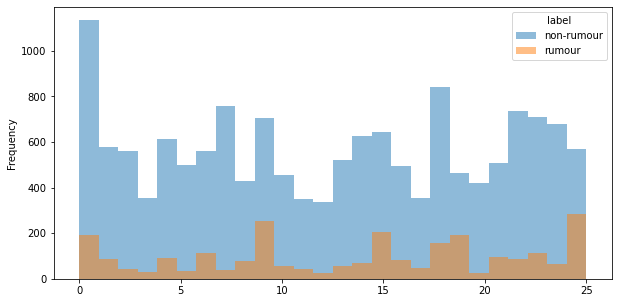

In [339]:
df_dominant_topic.pivot_table(index='Document_No', columns='label', values='Dominant_Topic').plot(kind='hist', alpha=0.5, bins=26, xlabel ='Sentiment Score')

In [259]:
total = df_dominant_topic.Dominant_Topic.value_counts(sort=False)

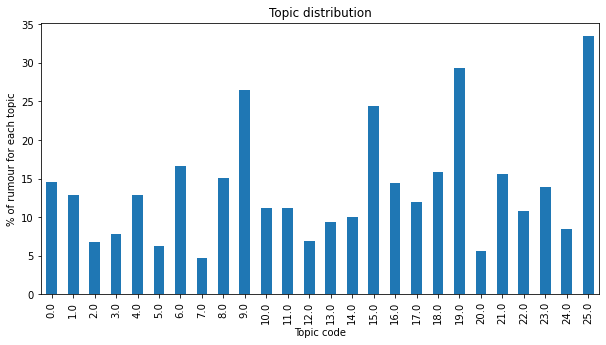

In [266]:
propor = df_dominant_topic[df_dominant_topic.label==1].Dominant_Topic.value_counts(sort=False)/total*100
propor.plot(kind='bar', xlabel ="Topic code", ylabel="% of rumour for each topic",title='Topic distribution')

### Topics source tweets topics

In [342]:
def getLDAmodel(text, num_topics):
    data_words = list(sent_to_words(text))
    data_words = remove_stopwords(data_words)
    common_dictionary = Dictionary(data_words)
    common_corpus = [common_dictionary.doc2bow(i) for i in data_words]
    
    return LdaMallet(mallet_path, corpus=common_corpus, num_topics=num_topics, id2word=common_dictionary,workers=10)



In [343]:
src = getLDAmodel(cov1.src_txt,26)

In [344]:
src.print_topics()

[(3,
  '0.192*"trump" + 0.097*"president" + 0.041*"house" + 0.032*"white" + 0.020*"administration" + 0.018*"realdonaldtrump" + 0.017*"force" + 0.016*"donald" + 0.016*"america" + 0.016*"press"'),
 (24,
  '0.042*"https" + 0.022*"day" + 0.020*"open" + 0.018*"economy" + 0.018*"reopening" + 0.018*"reopen" + 0.017*"county" + 0.013*"june" + 0.013*"close" + 0.012*"july"'),
 (5,
  '0.050*"spread" + 0.047*"https" + 0.036*"mask" + 0.036*"masks" + 0.030*"covid" + 0.026*"face" + 0.024*"wear" + 0.023*"stop" + 0.021*"protect" + 0.016*"wearing"'),
 (11,
  '0.160*"amp" + 0.036*"work" + 0.034*"workers" + 0.026*"medical" + 0.020*"working" + 0.018*"doctors" + 0.015*"care" + 0.014*"sick" + 0.012*"families" + 0.011*"food"'),
 (23,
  '0.087*"https" + 0.051*"news" + 0.032*"vaccine" + 0.023*"read" + 0.019*"story" + 0.018*"free" + 0.013*"covid" + 0.012*"fox" + 0.011*"coming" + 0.011*"post"'),
 (12,
  '0.031*"million" + 0.025*"bill" + 0.020*"relief" + 0.018*"democrats" + 0.014*"federal" + 0.013*"pay" + 0.013*"bi

In [ ]:

df_topic_sents_keywords = format_topics_sentences(ldamodel = src, corpus=common_corpus, texts=cov1.src_txt)

## Additional Features

In [215]:
from sklearn.feature_selection import mutual_info_classif

def mutualInfoScores(df, y):
    res = zip(df.columns,
                   mutual_info_classif(df, y, discrete_features=False)
                   )
    sorted_scores = sorted(res, key= lambda k: k[1], reverse=True)
    return sorted_scores

In [217]:
scores = mutualInfoScores(cov1[['ratio','tag','isolation','link','fav','deep', 'low', 'length', 'time_len', 'sent']], cov1.label)

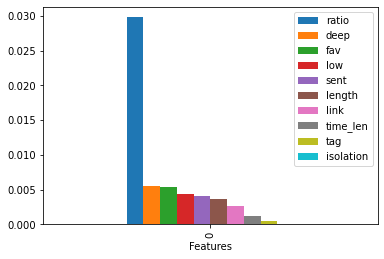

In [92]:
pd.DataFrame({f:[s] for f,s in scores}).plot(kind='bar', xlabel='Features')

No significative correlation

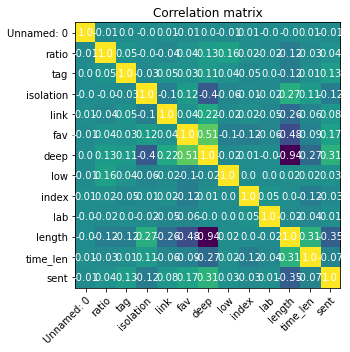

In [177]:
def correlation(df):
    corr = round(df.corr(),2)
    fig, ax = plt.subplots()
    im = ax.imshow(corr)

    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.index)))
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.index)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(corr.columns)):
        for j in range(len(corr.index)):
            text = ax.text(j, i, corr.iloc[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Correlation matrix")
    fig.tight_layout()
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.show()

correlation(cov1)

## Addtional trainset graph comparasion

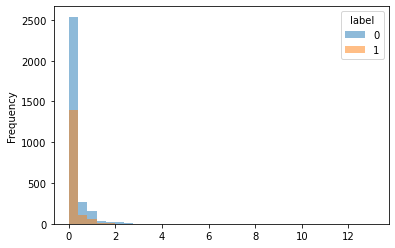

In [143]:
train1.pivot_table(index='index', columns='label', values='ratio').reset_index().plot(kind='hist', alpha=0.5, bins=33)

In [145]:
train = train1.copy()

In [184]:
train.head(3)

text  \
552800070199148544  How to respond to the murderous attack on Char...   
544388259359387648  You can't condemn an entire race, nation or re...   
552805970536333314  Attempts to extend blame for this to all Musli...   

                              source     ratio  tag  isolation  \
552800070199148544      Nelson Jones -3.323321    0   0.448276   
544388259359387648   Lauren Ashleigh  0.499795    1   0.800000   
552805970536333314  Iyad El-Baghdadi -4.396000    1   0.937500   

                                                            sentiment  link  \
552800070199148544  [-0.6124, -0.2755, -0.296, 0.0, 0.0, 0.0772, 0...     1   
544388259359387648  [0.5399, -0.6808, 0.2732, -0.6249, 0.0, -0.585...     0   
552805970536333314  [-0.8176, -0.7506, -0.7693, 0.0, -0.34, -0.765...     0   

                             fav      deep       low  label  \
552800070199148544  7.700006e+05  0.344828  0.448276      0   
544388259359387648  2.520001e+06  0.200000  0.633333      0   
552805970536333314  4.000000e+06  0.125000  0.000000      0   

                                 index  \
552800070199148544  552800070199148544   
544388259359387648  544388259359387648   
552805970536333314  552805970536333314   

                                                            sent_date  lentgh  \
552800070199148544  0     2015-01-07 12:13:01
1     2015-01-07 15:...      29   
544388259359387648  0     2014-12-15 07:07:29
1     2014-12-15 07:...      30   
552805970536333314  0     2015-01-07 12:36:28
1     2015-01-07 13:...      16   

                     time_len  
552800070199148544   9.563951  
544388259359387648  10.890442  
552805970536333314   9.471165

In [194]:
train1.ratio.describe()

count    4641.000000
mean        0.186841
std         0.467523
min         0.000000
25%         0.000782
50%         0.010349
75%         0.152595
max        13.071429
Name: ratio, dtype: float64

In [259]:
train['ratio'] = [np.log10(i+1) for i in train1.ratio]

In [257]:
train1.time_len.describe()

count    4.641000e+03
mean     5.683404e+04
std      1.395116e+05
min      0.000000e+00
25%      2.886000e+03
50%      1.096500e+04
75%      4.531900e+04
max      2.582753e+06
Name: time_len, dtype: float64

In [239]:
train['time_len'] = [np.log(i+1) for i in train1.time_len]

In [205]:
train1.lentgh.describe()

count    4641.000000
mean       17.478992
std        20.016298
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max       346.000000
Name: lentgh, dtype: float64

In [242]:
train['length'] = [np.log(i) for i in train1.lentgh]

In [243]:
train1.low.describe()

count    4641.000000
mean        0.123148
std         0.147844
min         0.000000
25%         0.000000
50%         0.068966
75%         0.210526
max         0.800000
Name: low, dtype: float64

In [244]:
train['low'] = [np.log(i+1) for i in train1.low]

In [245]:
train1.fav.describe()

count    4.641000e+03
mean     1.917510e+06
std      1.292548e+07
min      0.000000e+00
25%      3.800005e+05
50%      7.500003e+05
75%      1.540000e+06
max      6.982500e+08
Name: fav, dtype: float64

In [246]:
train['fav'] = [np.log(i+1) for i in train1.fav]

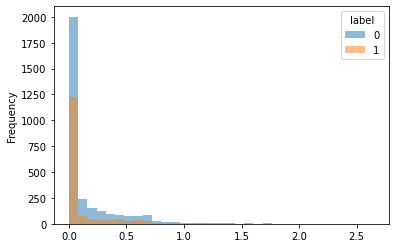

In [258]:
train.pivot_table(index='index', columns='label', values='ratio').reset_index().plot(kind='hist', alpha=0.5, bins=33)

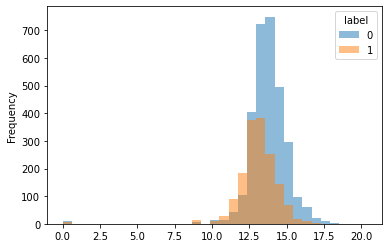

In [248]:
train.pivot_table(index='index', columns='label', values='fav').reset_index().plot(kind='hist', alpha=0.5, bins=33)

In [306]:
train.fav2.describe()

count    4641.000000
mean        6.323116
std         4.982873
min         0.000000
25%         3.218866
50%         4.094335
75%         5.941481
max        20.227329
Name: fav2, dtype: float64

In [326]:
def fav(df,k):
    fav = [i['favorite_count'] for i in df.iloc[k,1:] if i is not None]
    mean = np.mean(fav) if len(fav) > 0 else 0
    return np.log(1+df.iloc[k,0]['favorite_count']/(0.00001 + mean)) 

In [327]:
train['fav0'] = [fav(df,k) for k in range(df.shape[0])]

In [319]:
train['fav2'] = [np.log(1+df.iloc[k,0]['favorite_count']/(0.00001 + max([i['favorite_count'] for i in df.iloc[k,1:] if i is not None], default = 0))) for k in range(df.shape[0]) ]
train['fav3'] = [np.log(1+df.iloc[k,0]['favorite_count']/(0.00001 + sum([i['favorite_count'] for i in df.iloc[k,1:] if i is not None]))) for k in range(df.shape[0])]

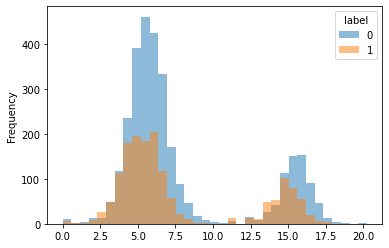

In [328]:
train.pivot_table(index='index', columns='label', values='fav0').reset_index().plot(kind='hist', alpha=0.5, bins=35)

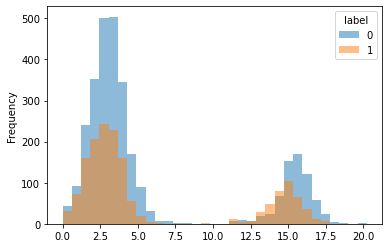

In [310]:
train.pivot_table(index='index', columns='label', values='fav3').reset_index().plot(kind='hist', alpha=0.5, bins=33)

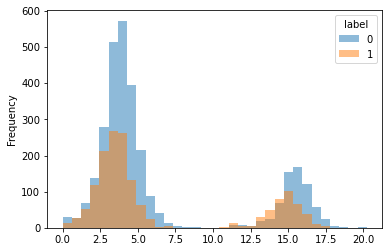

In [303]:
train.pivot_table(index='index', columns='label', values='fav2').reset_index().plot(kind='hist', alpha=0.5, bins=33)

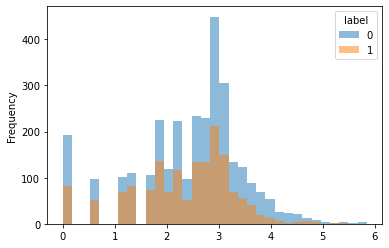

In [249]:
train.pivot_table(index='index', columns='label', values='length').reset_index().plot(kind='hist', alpha=0.5, bins=33)

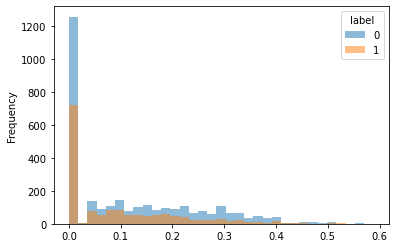

In [250]:
train.pivot_table(index='index', columns='label', values='low').reset_index().plot(kind='hist', alpha=0.5, bins=33)

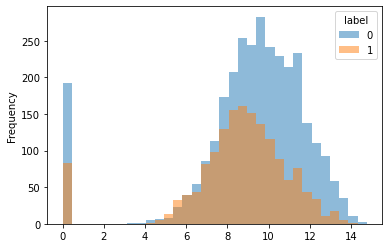

In [251]:
train.pivot_table(index='index', columns='label', values='time_len').reset_index().plot(kind='hist', alpha=0.5, bins=33)

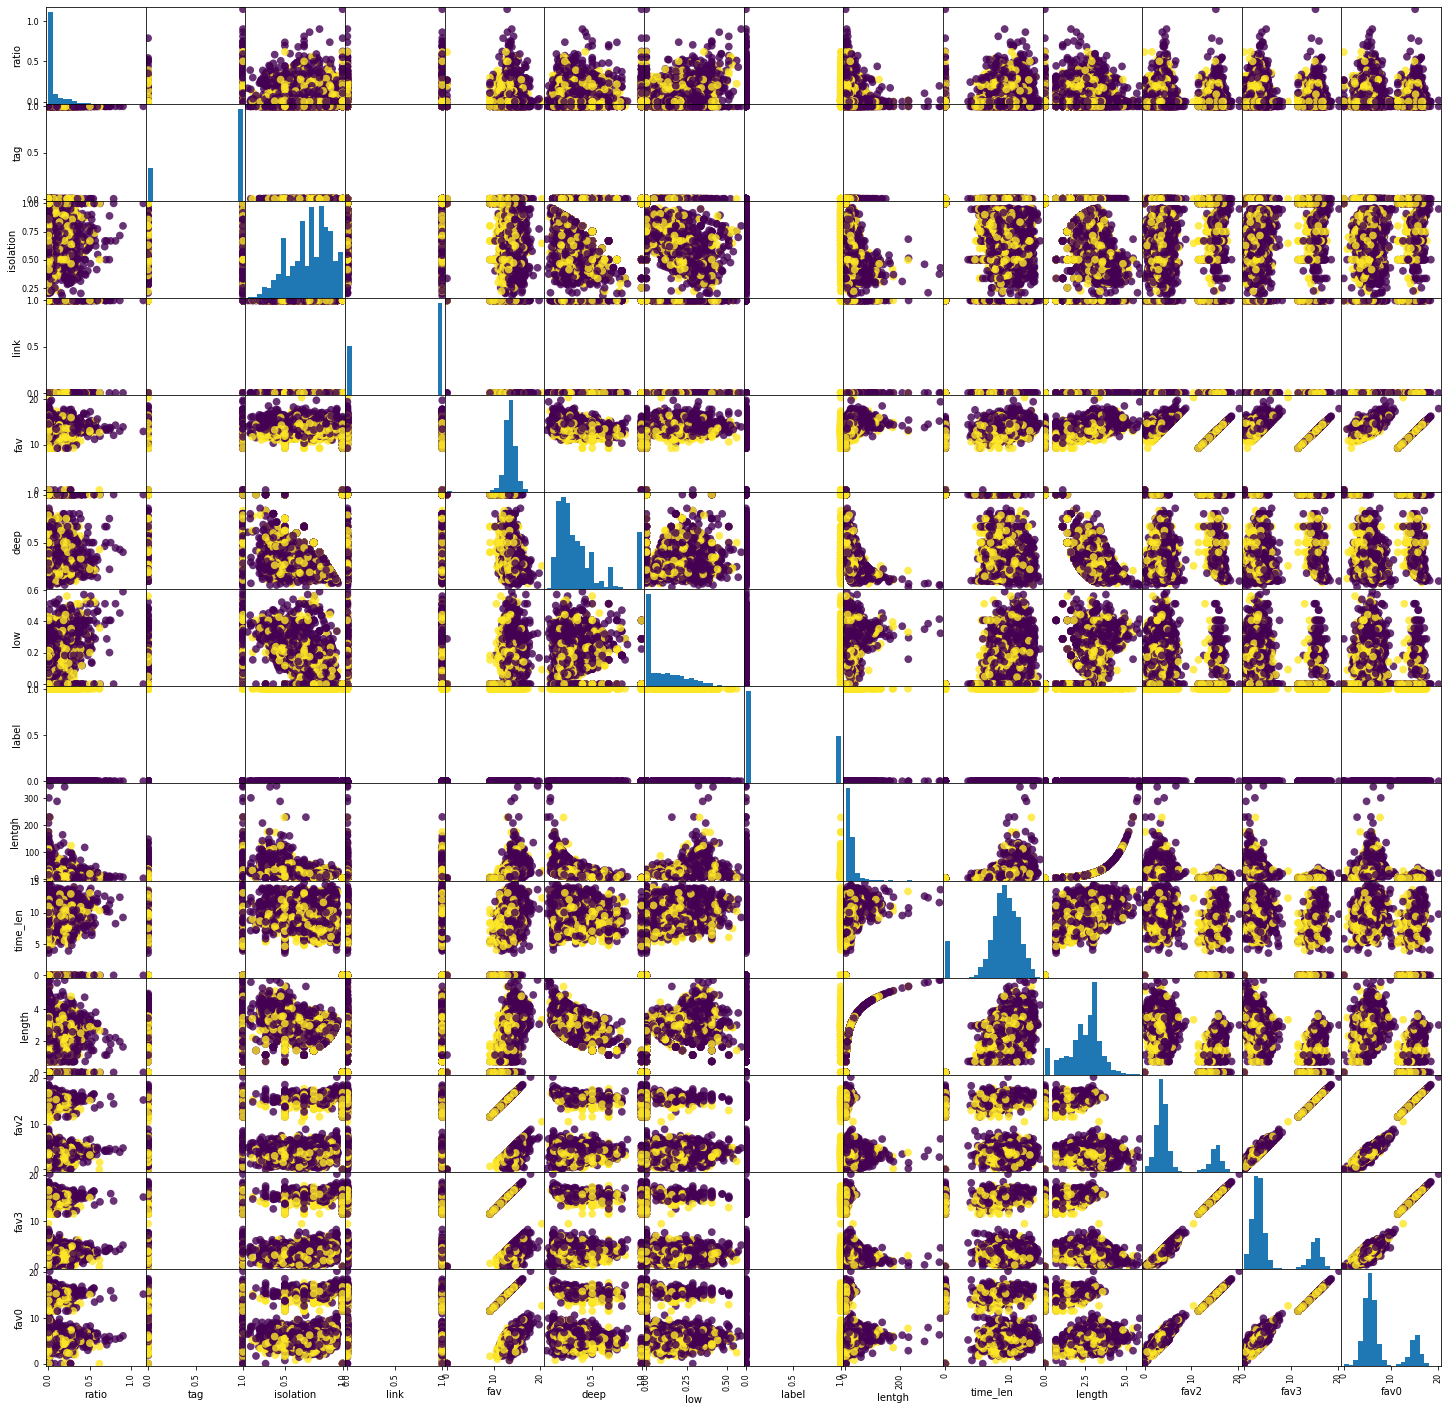

In [329]:
pd.plotting.scatter_matrix(train.iloc[:,:], c=train.label, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8);

In [ ]:
df.iloc[3,:]#.apply(lambda x: x['favorite_count'] if x is not None else [])[0]